---
title: "substituting outliers"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

Ok. We found the outliers. Now what?!

As usual, it depends.

## Do nothing

Assuming the outlier indeed happened in real life, and is not the result of faulty data transmission or bad data recording, then excluding an outlier might be the last thing you want to do. Sometimes extreme events do happen, such as a one-in-a-hundred-year storm, and they have a disproportionate weight on the system you are studying. The outliers might actually be the most interesting points in your data for all you know!

In case the outliers are not of interest to you, if you are using **robust** methods to analyze your data, you don't necessarily need to do anything either. For instance, let's say that you want to smooth your time series. If instead of taking the `mean` inside a sliding window you choose to calculate the `median`, then outliers shouldn't be a problem. Test it and see if it's true. Go on.

For many things you need to do (not only smoothing), you might be able to find robust methods. What do you do if you **have** to use a non-robust method? Well, then you can substitute the outlier for two things: NaN or imputated values.

## NaN

Substitute outliers for NaN.

NaN means "Not a Number", and is what you get when you try to perform a mathematical operation like 0/0. It is common to see NaN in dataset rows when data was not collected for some reason.

This might seem like a neutral solution, but it actually can generate problems down the line. See this example:

In [48]:
#| code-summary: "import stuff"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
from scipy.signal import savgol_filter


In [49]:
#| code-fold: false
# example using numpy
series = np.array([2, 4, 5, np.nan, 8, 15])
mean = np.mean(series)
print(f"the series average is {mean}")

the series average is nan


A single NaN in your time series ruins the whole calculation! There is a workaround though:

In [50]:
#| code-fold: false
mean = np.nanmean(series)
print(f"the series average is {mean}")

the series average is 6.8


You have to make sure what is the behavior of each function you use with respect to NaNs, and if possible, use a suitable substitute.

The same example in `pandas` would not fail:

In [51]:
#| code-fold: false
date_range = pd.date_range(start='2024-01-01', periods=len(series), freq='1D')
df = pd.DataFrame({'series': series}, index=date_range)
mean = df['series'].mean()
print(f"the series average is {mean}")

the series average is 6.8


## imputate values

To "imputate values" means to fill in the missing value with a guess, an estimation of what this data point "should have been" if it were measured in the first place. Why should we bother to do so? Because many tools that we know and love don't do well with missing values.

We learned about the Savitzky-Golay filter for smoothing data. See what happens when there is a single NaN in the series:

In [52]:
#| code-summary: "create time series"
steps = np.random.randint(low=-2, high=2, size=100)
data = steps.cumsum()
date_range = pd.date_range(start='2023-01-01', periods=len(data), freq='1D')
df = pd.DataFrame({'series': data}, index=date_range)
df.loc['2023-02-05', 'series'] = np.nan

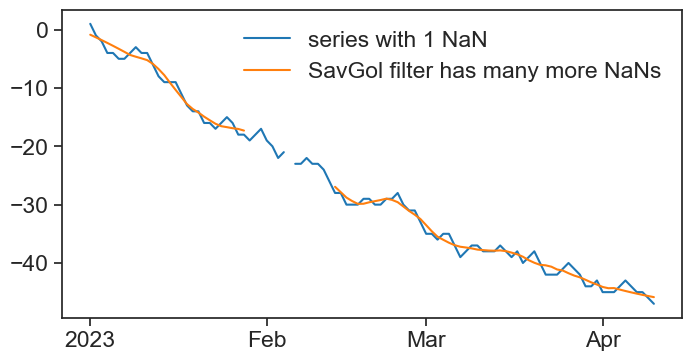

In [53]:
#| code-summary: "smooth it and then plot"
df['sg'] = savgol_filter(df['series'], window_length=15, polyorder=2)

def concise(ax):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df['series'], color="tab:blue", label="series with 1 NaN")
ax.plot(df['sg'], color="tab:orange", label="SavGol filter has many more NaNs")
concise(ax)
ax.legend(frameon=False);

We will deal with this topic in the next chapter, "interpolation". There, we will learn a few methods to fill in missing data, and basic NaN operations you should be acquainted with.